# 8. Gnuplot - narzędzie do wizualizacji danych

In [1]:
%load_ext gnuplot_kernel

Jednym z lepszych narzędzi do sprawnego i czytelnego tworzenia wykresów jest program `gnuplot`. Występuje on w wersji zarówno dla Linuxa i Windowsa. Poniżej przedstawię intrukcję instalacji na Linuxie. W przypadku używania powłoki `bash` na Windowsie za pomocą __Windows Subsystem for Linux__ (WSL), sposób instalacji niczym się nie różni. Ten sposób zapewni możliwość wywoływania `gnuplot`-a z terminala.

Aby zainstalować `gnuplot`-a należy wpisać komendę:<br>
``` bash
sudo apt install gnuplot
```
Program `gnuplot` powinien zainstalować się w wersji 5. Aby go uruchomić, należy po prostu wpisać komendę `gnuplot`.<br>
![SegmentLocal](gnuplot.gif "segment")<br>

### __[UWAGA]__ Wszystkie komendy w tym dokumencie poprzedzone znakiem `%` są tylko na potrzeby tego notebook-a, nie należy ich wpisywać do `gnuplot`-a.

## __8.1 Podstawowa komenda - `plot`__

Z `gnuplot`-em można pracować na dwa sposoby: __w trybie interaktywnym__ oraz __za pomocą skryptu__. W pierwszej kolejności skupimy się na pracy interaktywnej. Po otwarciu `gnuplot`-a dostajemy do dyspozycji konsolę z możliwością wpisywania do niej komend. Najbardziej podstawową komendą jest `plot`, która służy do stworzenia wykresu. Po komendzie `plot` należy wpisać co chcemy narysować. Może to być nazwa pliku z danymi lub np. funkcja.
#### __1) Parabola $x^2$__

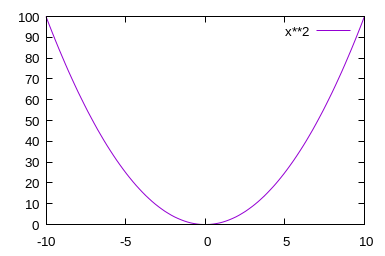

In [2]:
%%gnuplot
plot x**2

#### __2) Możliwe jest także zdefiniowanie własnej funkcji i zmiennych__

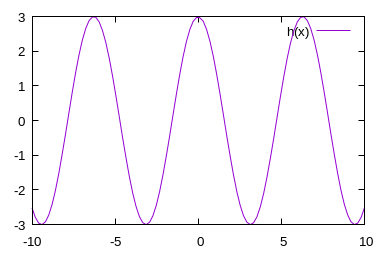

In [3]:
%%gnuplot
a=3
h(x)=a*cos(x)
plot h(x)

#### __3) Przykład jak wprowadzić inne ustawienia, m.in.: tytuł wykresu, oznaczenia osi, zakres osi, skalowanie__

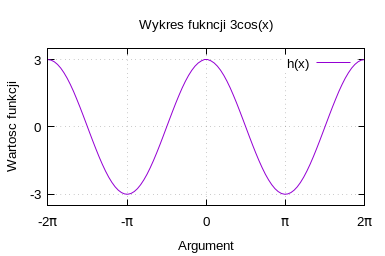

In [4]:
%%gnuplot
set title"Wykres fukncji 3cos(x)"   # tytuł wykresu
set xlabel"Argument"                # etykieta osi x
set ylabel"Wartosc funkcji"              # etykieta osi y
set grid                            # wyswietlenie siatki
set xrange[-2*pi:2*pi]              # zakres osi x
set yrange[-3.5:3.5]                # zakres osi y
set xtics("-2{/Symbol p}"-2*pi, "-{/Symbol p}"-pi, "0"0,"{/Symbol p}"pi,"2{/Symbol p}"2*pi)   # połozenie znaczników osi x
set ytics("0"0,-3,3)  # połozenie znaczników osi x
plot h(x)                           # własna funkcja h(x)

#### __4) Argumenty po komendzie `plot`__

Po komendzie `plot` należy podać co chcemy narysować. Możliwe jest również dodatkowe ustawienie wyświetlanego wykresu. Można wybrać typ linii lub punktów, kolor, rozmiar, itp.

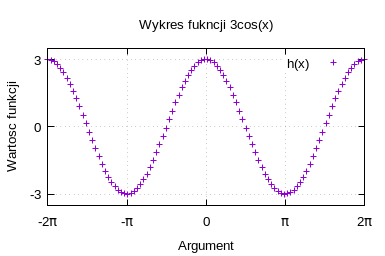

In [5]:
%%gnuplot
plot h(x) with points          # with points -> rysowanie wykresu z punktami, można zastosować również skróconą werjsę: w p

Inne możliwe modyfikatory:
 - __pt__ <numer> : (point type) typ punktu, po nim musi być podany numer
 - __ps__ <numer> : (point size) rozmiar punktu
 - __lw__ <numer> : (line width) grubość linii
 - __dt__ <numer> : (dash type) rozdzaj linii
 - __lc__ <numer> : (line color) kolor linii<br>

Zawsze można wywołać grafikę pomocniczą, wpisując komendę `test`.<br>
![title](gnuplot.png)

#### __Kilka przykładów:__

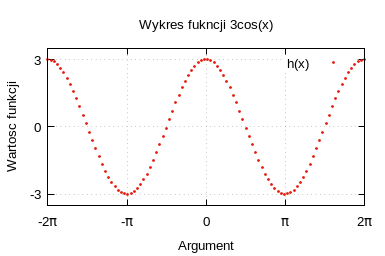

In [6]:
%%gnuplot
plot h(x) w p pt 7 ps 0.3 lc 7

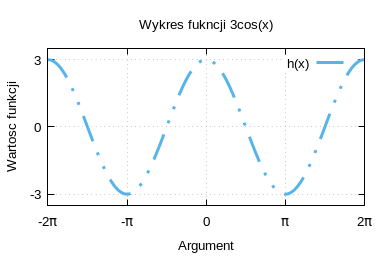

In [7]:
%%gnuplot
plot h(x) w l dt 5 lw 3 lc 3

## __8.2 Zapisywanie wykresu__

Domyślnym wyjście dla komendy `plot` jest serwer graficzny i wyświetlenie wykresu w oknie. Żeby zapisać wykres do pliku należy zmienić domyślne wyjście, za pomocą komendy `set term` i wskazać `pngcairo`, dodatkowo można ustawić rozmiar. Następnie `set output "<nazwa_pliku>"` wskazuje do jakiego pliku chcemy zapisać wykres.

In [9]:
%%gnuplot
set term pngcairo size 1024,768
set output "wykres.png"
plot h(x) w p pt 7 ps 0.3 lc 7

set term pngcairo size 1024,768

Terminal type is now 'pngcairo'
Options are ' background "#ffffff" enhanced fontscale 1.0 size 1024, 768 '

## __8.3 Rysowanie z pliku z danymi__

Aby stowrzyć wykres z danymi z plku, wystarczy po komendzie `plot` podać nazwę pliku. Taki plik msui mieć strukturę kolumn oddzieonych białymi znakami. Domyślnie używane są dwie pierwsze kolumny.<br>
W poniższym przykładzie rysowane są zarówno punkty jak i linia (używając modyfikatora __lp [line point]__ ). W używanym pliku, pierwsza kolumna to czas, druga to strumień, a trzecia to błąd pomiaru.

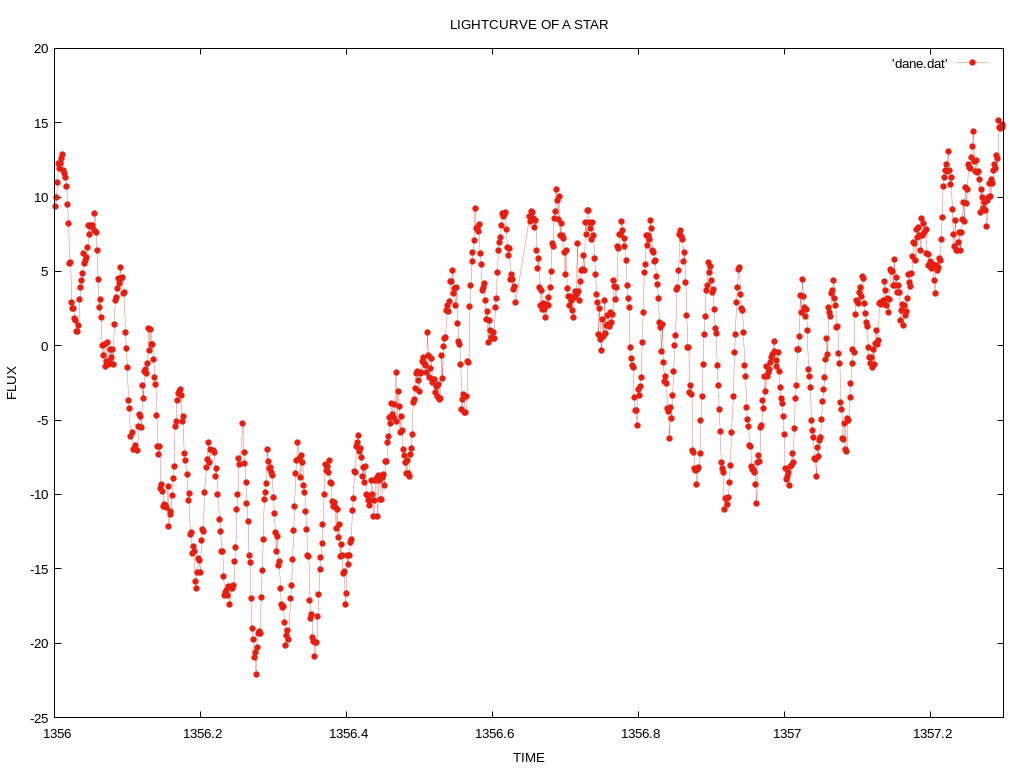

In [39]:
%%gnuplot
set title"LIGHTCURVE OF A STAR"
set xlabel"TIME"
set ylabel"FLUX"            
set xrange[1356:1357.3]
plot 'dane.dat' w lp ps 1 pt 7 lc 7 lw 0.3    # domyślnie rysowane są dwie pierwsze kolumny"

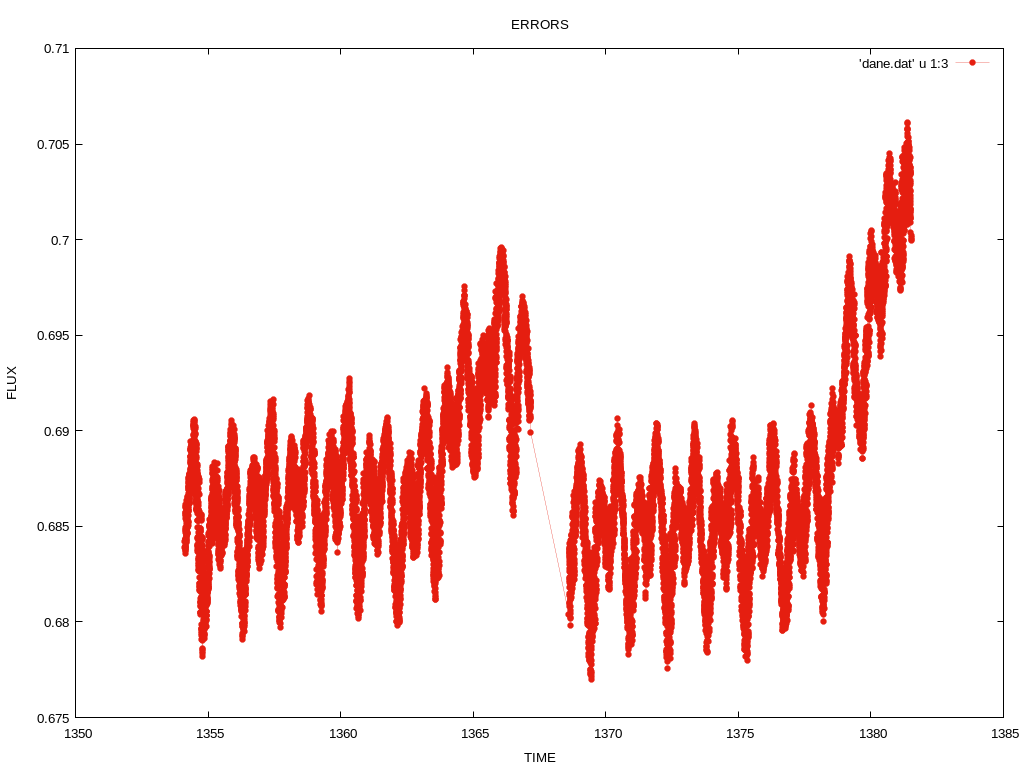

In [55]:
%%gnuplot
set title "ERRORS"
set autoscale
plot 'dane.dat' u 1:3 w lp ps 1 pt 7 lc 7 lw 0.3    # rysowanie pierwszej i trzeciej kolumny

#### Rysowanie wraz z zaznaczonymi błędami: `w ye` (with yerrorbars)

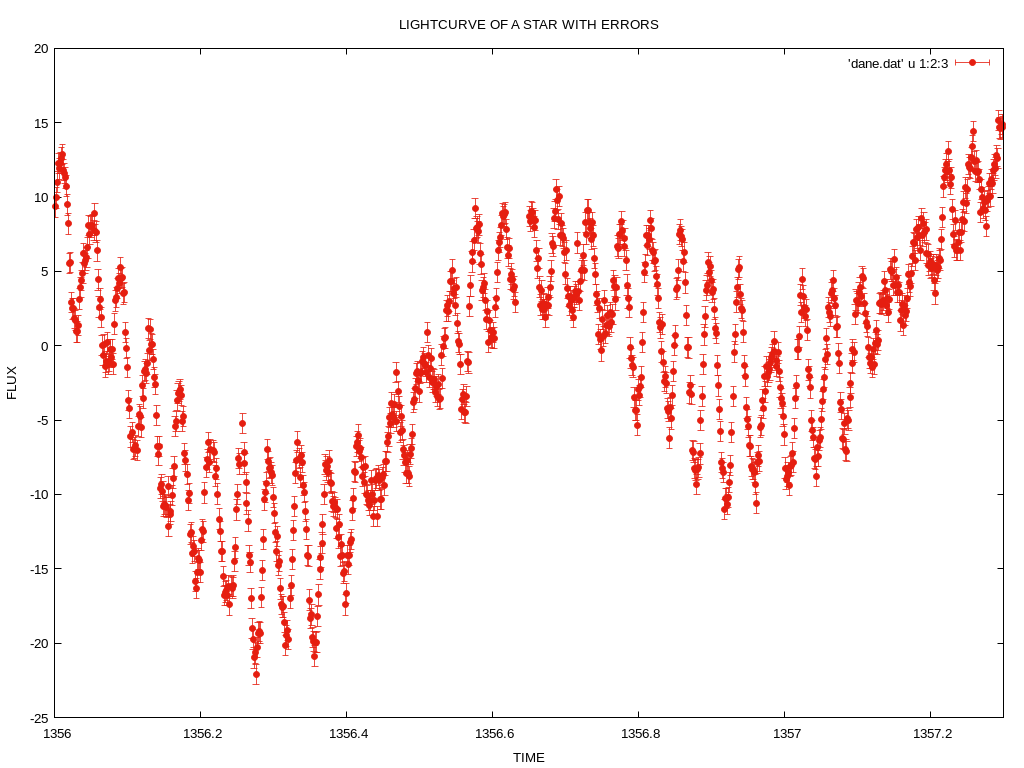

In [54]:
%%gnuplot
set title "LIGHTCURVE OF A STAR WITH ERRORS"
plot 'dane.dat' u 1:2:3 w ye ps 1 pt 7 lc 7 lw 0.8    # rysowanie pierwszej i trzeciej kolumny